In [1]:
%matplotlib inline
import sys
import outliers
import pandas as pd
import matplotlib.pyplot as plt
from outliers import ddc_outlier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
import numpy as np

import warnings
warnings.filterwarnings('ignore')

prescription = pd.read_csv('../data/prescriptions_subdose.csv.gz', compression='gzip')

In [2]:
medications = outliers.getOverdoseMedications(prescription)
medications.shape

(74,)

In [3]:
ep_range = np.arange(0.01,1.0,0.01)
results, max_f = outliers.runParameterSearch(prescription, np.asarray(medications), ep_range)

ABACAVIR 300 mg CP, 2124, 22, 4, 264.87994350282486, 278.70852480885253, 151.0, 1.0, 151.0, 600.0, 528.5310734463277, 127.80011934019265, 600.0, 600.0, 600.0, 600.0, 1.228813559322034, 0.4200689400472451, 1.0, 1.0, 1.0, 1.0, (DDC-J+0.04), 1.0, , (DDC+0.91), 1.0, , (IsoF+0.01), 1.0, 
ACICLOVIR 200 mg CP, 2359, 63, 19, 138.44150063586267, 178.69923255932096, 103.0, 3.0, 103.0, 200.0, 273.59050445103856, 165.33482211210094, 200.0, 200.0, 200.0, 200.0, 3.2924968206867318, 0.8494511590487249, 3.0, 3.0, 3.0, 3.0, (DDC-J+0.42000000000000004), 0.36416184971098264, , (DDC+0.9500000000000001), 0.36416184971098264, , (IsoF+0.03), 0.696132596685083, 
ALOPURINOL 100 mg CP, 4729, 23, 12, 79.5297631634595, 99.94326598051478, 53.0, 1.0, 53.0, 100.0, 157.67604144639458, 88.1080476457649, 100.0, 100.0, 100.0, 300.0, 1.3834848805244238, 0.7766278436973779, 1.0, 1.0, 1.0, 1.0, (DDC-J+0.04), 0.6388888888888888, , (DDC+0.91), 0.4946236559139785, , (IsoF+0.01), 0.14457831325301204, 
AMITRIPTILINA 25 mg CP, 1

DIPIRONA 500 mg/ml SOL ORAL - com conta-gotas acoplado na tampa do frasco ou na embalagem do medicamento, 28967, 1360, 22, 21.344828943280287, 17.809323202007736, 13.0, 4.0, 13.0, 40.0, 38.65640211274899, 5.901216630939773, 40.0, 40.0, 40.0, 40.0, 4.033255773811579, 0.3721517138540149, 4.0, 4.0, 4.0, 4.0, (DDC-J+0.51), 0.8556149732620321, , (DDC+0.9600000000000001), 0.8556149732620321, , (IsoF+0.04), 0.8447837150127228, 
DOMPERIDONA 1 mg/ml SUSP ORAL, 5478, 784, 16, 6.833789704271632, 4.432285660337538, 4.5, 3.0, 4.5, 10.0, 10.752464403066814, 2.9029684084753327, 10.0, 10.0, 10.0, 10.0, 2.9151150054764514, 0.3886694985546314, 3.0, 3.0, 3.0, 3.0, (DDC-J+0.97), 0.6898372195336558, , (DDC+0.99), 0.5569932224276033, , (IsoF+0.16), 0.8036904151717068, 
ENALAPRIL 20 mg CP, 9585, 78, 8, 11.001262389149714, 9.1237466949313, 6.5, 2.0, 6.5, 20.0, 20.02401669274909, 1.9080176046593627, 20.0, 20.0, 20.0, 20.0, 1.978508085550339, 0.15743532198191842, 2.0, 2.0, 2.0, 2.0, (DDC-J+0.05), 0.968944099378

TENOFOVIR 300mg + LAMIVUDINA 300mg CP, 4518, 62, 6, 0.9979138999563967, 0.043951531982527936, 1.0, 1.0, 1.0, 1.0, 0.9957945993815848, 0.04566196354373274, 1.0, 1.0, 1.0, 1.0, 1.0000332005312085, 0.042065146412444354, 1.0, 1.0, 1.0, 1.0, (DDC-J+0.060000000000000005), 1.0, , (DDC+0.9500000000000001), 1.0, , (IsoF+0.01), 0.8518518518518519, 
TRAMADOL 50mg/ml 1ml SOL INJ, 21006, 46, 14, 31.966913976958963, 31.92243034297547, 15.5, 3.0, 15.5, 50.0, 60.46129677235076, 20.342188399507997, 50.0, 50.0, 50.0, 50.0, 3.4725311815671707, 0.647137807985908, 3.0, 3.0, 3.0, 4.0, (DDC-J+0.03), 0.6524822695035462, , (DDC+0.91), 0.23958333333333334, , (IsoF+0.03), 0.10514285714285715, 
VARFARINA 5 mg CP, 6419, 135, 12, 3.3373890014020877, 3.208762651959084, 1.25, 1.0, 1.25, 5.0, 5.675089577815859, 3.108451680959119, 5.0, 5.0, 5.0, 5.0, 0.9996884249883159, 0.012477596998385769, 1.0, 1.0, 1.0, 1.0, (DDC-J+0.17), 0.9642857142857143, , (DDC+0.93), 0.9642857142857143, , (IsoF+0.01), 0.8934426229508198, 
VITAM

In [4]:
display(results)

,Time,Accuracy,Recall,Precision,F-Measure
DDC-J,0.038137,0.962573,0.904127,0.611907,0.687436
DDC,0.045686,0.956842,0.860390,0.507756,0.584763
IsoF,0.419451,0.964570,0.916662,0.555856,0.634526


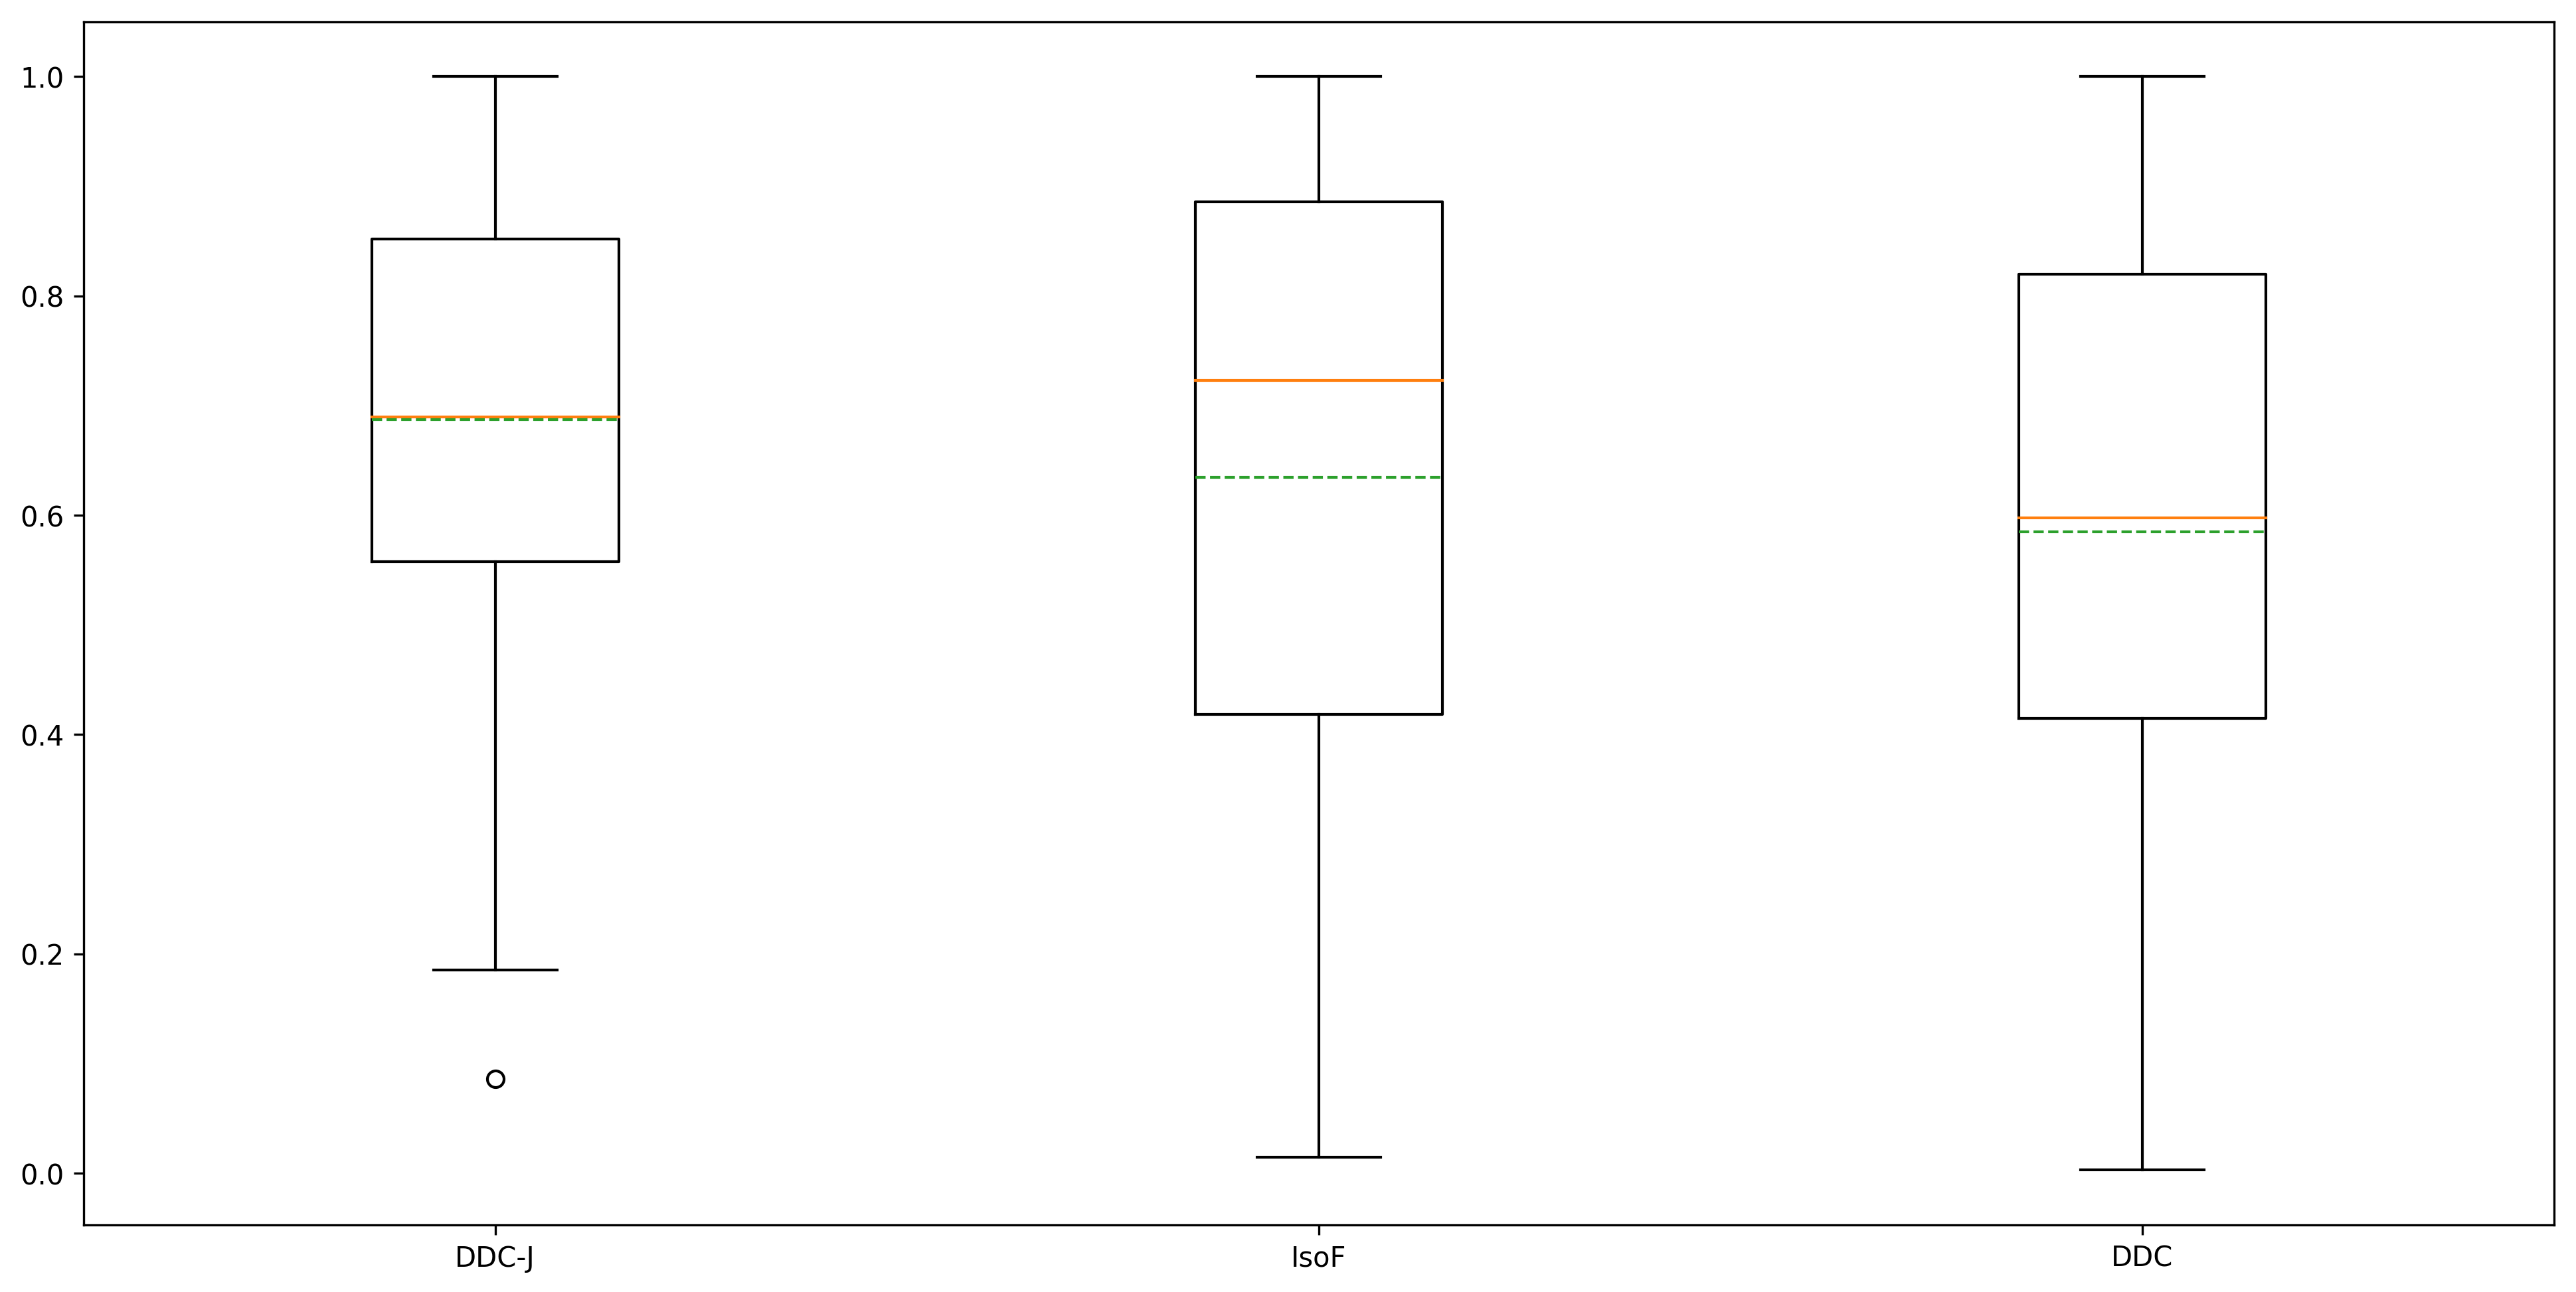

In [6]:
%matplotlib inline
plt.figure(figsize=(16, 8), dpi= 300)

data = []

data.append(max_f.loc['DDC-J'].values)
data.append(max_f.loc['IsoF'].values)
#data.append(max_f.loc['Cov'].values)    
data.append(max_f.loc['DDC'].values)    
#data.append(max_f.loc['DDC-C'].values)

labels = ['DDC-J','IsoF','DDC']

plt.boxplot(data, labels=labels, showmeans=True, meanline=True)

plt.show()